<a href="https://colab.research.google.com/github/yyw-informatics/RNA-seq-InfluenzaNP-CD8-T-cells/blob/main/NP_sequence_alignment_visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and load Packages 

In [1]:
library(ggtree)
library(ggmsa)
library(seqinr)
library(ape)
library(msa)
library(Biostrings)
library(dplyr)

Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun

ggtree v3.2.0  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

1. Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96
2. Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution. 2018, 35(12):3041-3043. doi:10.1093/molbev/msy194
3. Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628



Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggpl

In [3]:
## CRAN PACKAGES
#install.packages("devtools")
#install.packages("ape")
#install.packages("seqinr")

##### Bioconductor packages
#install.packages("BiocManager")
#BiocManager::install("msa")
#BiocManager::install("Biostrings")

## GitHub packages
library(devtools)
devtools::install_github("YuLab-SMU/ggmsa")

Loading required package: usethis

Skipping install of 'ggmsa' from a github remote, the SHA1 (f1e62e07) has not changed since last install.
  Use `force = TRUE` to force installation



# Read in the fasta file 

In [4]:
setwd('/scicomp/groups/OID/NCEZID/DSR/BCFB/by-project/MIS11602')

In [5]:
np <- readAAStringSet('NP_SequenceAlignment.fasta')
np

AAStringSet object of length 85:
     width seq                                              names               
 [1]     9 ASNENMETM                                        Reference
 [2]     9 ASNENMDAM                                        A/HongKong/1/1968...
 [3]     9 ASNENVEAM                                        A/HongKong/156/97...
 [4]     9 ASNENVEAM                                        A/NewJersey/8/197...
 [5]     9 ASNENMDNM                                        A/Memphis/4/1980_...
 ...   ... ...
[81]     9 ASNENMETM                                        A/BrevigMission/1...
[82]     9 ASNENVEAM                                        A/HongKong/156/97...
[83]     9 ASNENMETM                                        A/NewYork/108/201...
[84]     9 ASNENMETM                                        A/Netherlands/219...
[85]     9 ASNENVEAM                                        A/HongKong/1073/9...

### Create a data.frame

In [6]:
npdat <- data.frame(header = names(np), seq = np)
head(npdat)
dim(npdat)

,header,seq
,<chr>,<chr>
1,Reference,ASNENMETM
2,A/HongKong/1/1968_H3N2,ASNENMDAM
3,A/HongKong/156/97_H5N1,ASNENVEAM
4,A/NewJersey/8/1976_H1N1,ASNENVEAM
5,A/Memphis/4/1980_H3N2,ASNENMDNM
6,A/Shanghai/6/1990_H3N2,ASNENMDNM


[1] 85  2

### Remove duplicated sequences in the data.frame

In [7]:
cat(sum(duplicated(names(np)) == TRUE), 'sequences are duplicates')

40 sequences are duplicates

In [8]:
# view first few duplicated rows to confirm
npdat %>%
  dplyr::group_by(header) %>% 
  dplyr::filter(n()>1) %>%
  dplyr::arrange(header) %>%
  head

header,seq
<chr>,<chr>
A/Albany/12/1951_H1N1,ASNENMDTM
A/Albany/12/1951_H1N1,ASNENMDTM
A/Beijing/337/1989_H3N2,ASNENMDNM
A/Beijing/337/1989_H3N2,ASNENMDNM
A/Beijing/39/1975_H3N2,ASNENMDTM
A/Beijing/39/1975_H3N2,ASNENMDTM


In [9]:
npdat <- distinct(npdat) # keep only distinct rows
npdat$subtype <- sapply(strsplit(npdat$header, '_'), '[', 2) # get the subtypes from headers

### Subset AAstringset object

In [10]:
np <- np[npdat$header]

# Build Multiple Sequence Alignment (MSA)

In [11]:
np_align <- msa(np, method = 'ClustalW')
np_align
class(np_align) <- "AAMultipleAlignment"

use default substitution matrix


CLUSTAL 2.1  

Call:
   msa(np, method = "ClustalW")

MsaAAMultipleAlignment with 45 rows and 9 columns
     aln       names
 [1] ASNENMETM Reference
 [2] ASNENMETM A/Iowa/1943_H1N1
 [3] ASNENMETM A/Turkey/Wisconsi...
 [4] ASNENMETM A/PuertoRico/8/19...
 [5] ASNENMETM A/Leningrad/1954/...
 [6] ASNENMETM A/BrevigMission/1...
 [7] ASNENMETM A/NewYork/108/201...
 [8] ASNENMETM A/Netherlands/219...
 [9] ASNENMDTM A/Texas/1/1977_H3N2 
 ... ...
[38] ASNENMDNM A/Memphis/6/1986_...
[39] ASNENMDAM A/HongKong/1/1968...
[40] ASNENVEAM A/HongKong/156/97...
[41] ASNENVEAM A/NewJersey/8/197...
[42] ASNENVEAM A/HongKong/156/97...
[43] ASNENVEAM A/HongKong/1073/9...
[44] ASNENMEAM A/HongKong/212/03...
[45] ASNENMEAM A/Phila/1935_H1N1
 Con ASNENMDTM Consensus 

# Visuals

## Without annotation

### LETTER color

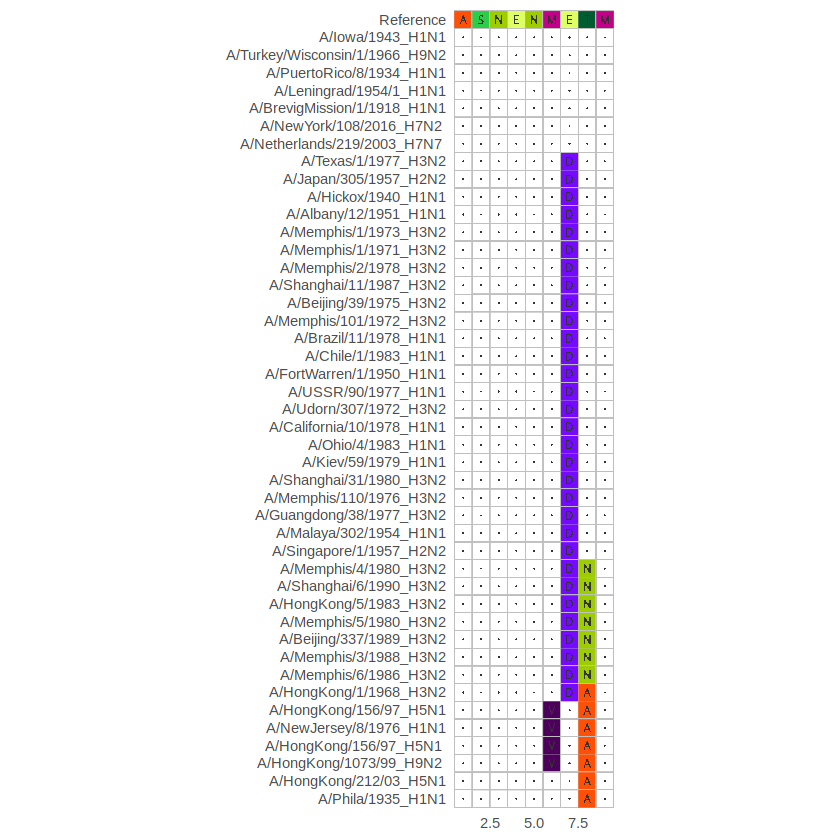

In [12]:
ggmsa(np_align, 
  ref = "Reference",
  color = "LETTER", 
  font = "DroidSansMono", 
  char_width = 0.5, 
  seq_name = TRUE, 
  consensus_views = TRUE, 
  use_dot = TRUE,
  show.legend = TRUE)

## With annotation

### LETTER color

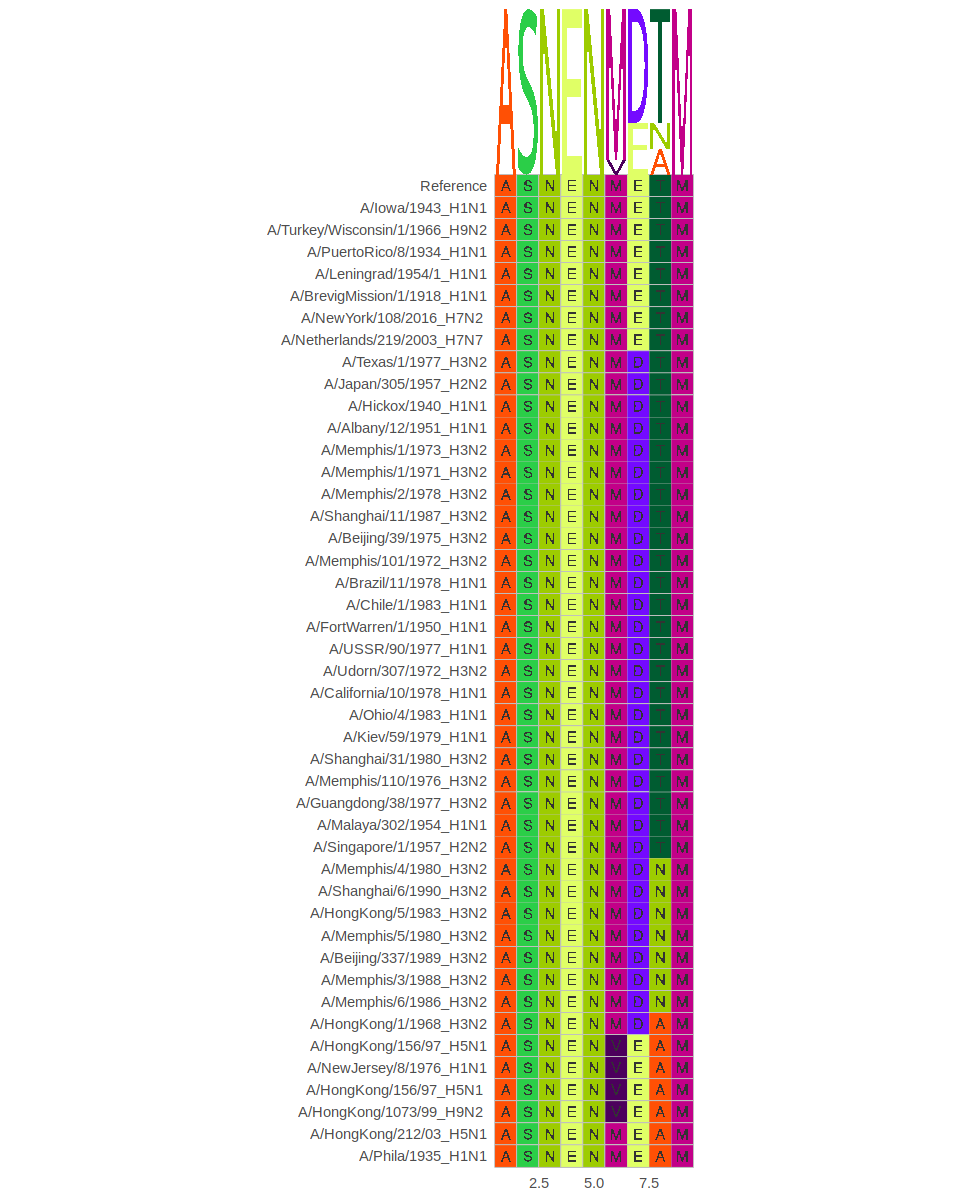

In [15]:
options(repr.plot.width = 8, repr.plot.height = 10)
ggmsa(np_align, seq_name = TRUE, char_width = 0.5, color = 'LETTER') + geom_seqlogo(color = 'LETTER')  #+ geom_msaBar()